# Q1

In [4]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForSeq2SeqLM

In [9]:
model_name = 'google/mt5-small'
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    config=config)

In [6]:
config

MT5Config {
  "_name_or_path": "google/mt5-small",
  "architectures": [
    "MT5ForConditionalGeneration"
  ],
  "d_ff": 1024,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "mt5",
  "num_decoder_layers": 8,
  "num_heads": 6,
  "num_layers": 8,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "tokenizer_class": "T5Tokenizer",
  "transformers_version": "4.17.0",
  "use_cache": true,
  "vocab_size": 250112
}

In [10]:
tokenizer

PreTrainedTokenizerFast(name_or_path='google/mt5-small', vocab_size=250100, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'})

In [14]:
model

MT5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedGeluDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (w

# Q2

In [13]:
import matplotlib.pyplot as plt
import json

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5n2530o_ because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
log_path = './training_logs/trainer_state.json'
f = open(log_path)
log = json.load(f)

In [10]:
steps, rouge_1_fs, rouge_2_fs, rouge_l_fs = [], [], [], []
count = 0
for logs in log['log_history']:
    if count % 2 != 0:
        steps.append(logs['step'])
        rouge_1_fs.append(logs['eval_rouge-1_f'])
        rouge_2_fs.append(logs['eval_rouge-2_f'])
        rouge_l_fs.append(logs['eval_rouge-l_f'])
    count += 1

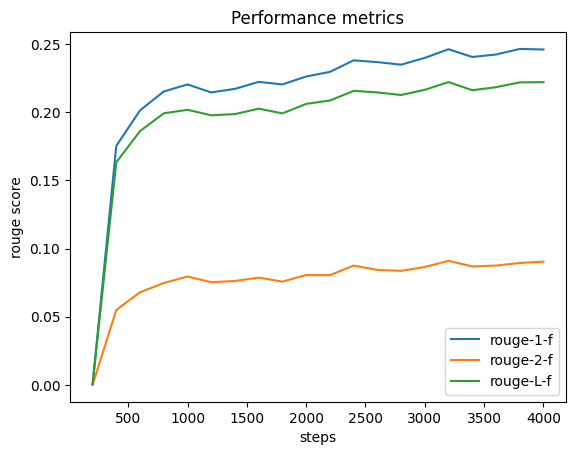

In [18]:
plt.plot(steps, rouge_1_fs, label='rouge-1-f')
plt.plot(steps, rouge_2_fs, label='rouge-2-f')
plt.plot(steps, rouge_l_fs, label='rouge-L-f')
plt.legend()
plt.xlabel("steps")
plt.ylabel("rouge score")
plt.title("Performance metrics")
plt.show()